# **Problem 1 : Getting Started with Data Exploration - Some Warm up**

In [145]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
# Loading the dataset
df = pd.read_csv("/content/drive/MyDrive/Assignment1/WHR-2024-5CS037.csv")

In [148]:
# 1. Data Exploration and Understanding
## 1.1 Dataset Overview
# Display the first 10 rows of the dataset
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [149]:
# Identify the number of rows and columns
rows,columns = df.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")

Number of rows: 143, Number of columns: 9


In [150]:
# List all columns and their data types
print("Columns and their data types:")
df.dtypes

Columns and their data types:


,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


In [151]:
# 1.2 Basic Statistics:
# Calculate mean, median, and standard deviation for the Score column
score_mean = df['score'].mean()
score_median = df['score'].median()
score_std = df['score'].std()
print(f"Mean of Score: {score_mean}, Median of Score: {score_median}, Standard Deviation of Score: {score_std}")

Mean of Score: 5.52758041958042, Median of Score: 5.785, Standard Deviation of Score: 1.1707165099442995


In [152]:
# Identify the country with the highest and lowest happiness scores
highest_score_country = df.loc[df['score'].idxmax()]['Country name']
lowest_score_country = df.loc[df['score'].idxmin()]['Country name']
print(f"Country with the highest score: {highest_score_country}")
print(f"Country with the lowest score: {lowest_score_country}")

Country with the highest score: Finland
Country with the lowest score: Afghanistan


In [153]:
## 1.3 Missing Values
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [154]:
## 1.4 Filtering and Sorting
# Filter countries with Score > 7.5
high_score_countries = df[df['score'] > 7.5]
print("Countries with Score greater than 7.5:")
high_score_countries

Countries with Score greater than 7.5:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


In [155]:
# Sort the filtered dataset by GDP per Capita in descending order and display the top 10 rows
sorted_high_score = high_score_countries.sort_values(by='Log GDP per capita', ascending=False).head(10)
print("Top 10 countries with Score > 7.5 sorted by GDP per Capita:")
sorted_high_score

Top 10 countries with Score > 7.5 sorted by GDP per Capita:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


In [156]:
## 1.5 Adding New Columns
# Create a new column for Happiness Category
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(categorize_happiness)
print("Dataset with new Happiness Category column:")
df.head(10)

Dataset with new Happiness Category column:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906,High
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586,High
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540,High
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488,High
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745,High


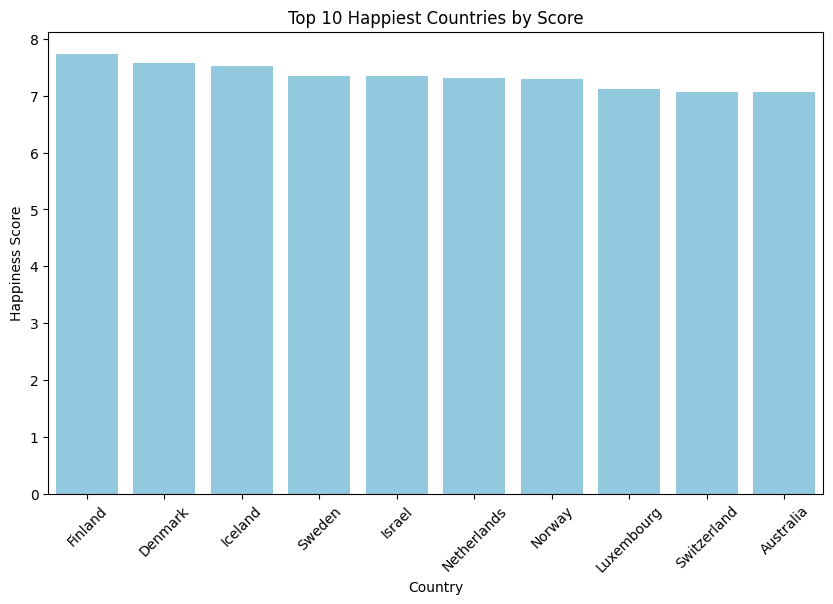

In [157]:
# 2. Data Visualizations
## 2.1 Bar Plot for Top 10 Happiest Countries
happiest_countries = df.sort_values(by='score', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y='score', x='Country name', data=happiest_countries, color='skyblue')
plt.title('Top 10 Happiest Countries by Score')
plt.ylabel('Happiness Score')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

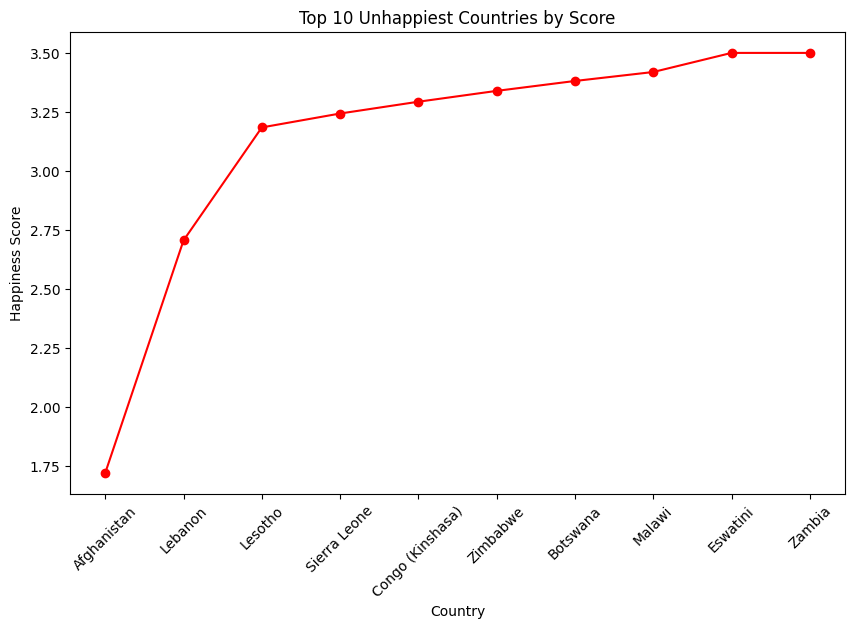

In [158]:
## 2.2 Line Plot for Top 10 Unhappiest Countries
unhappiest_countries = df.sort_values(by='score', ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.plot(unhappiest_countries['Country name'], unhappiest_countries['score'], marker='o', linestyle='-', color='red')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

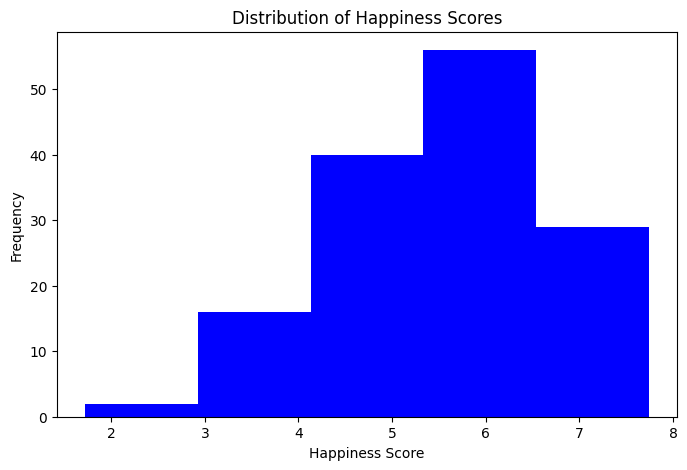

In [159]:
## 2.3 Histogram for Score Column
plt.figure(figsize=(8, 5))
plt.hist(df['score'], bins=5, color='blue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


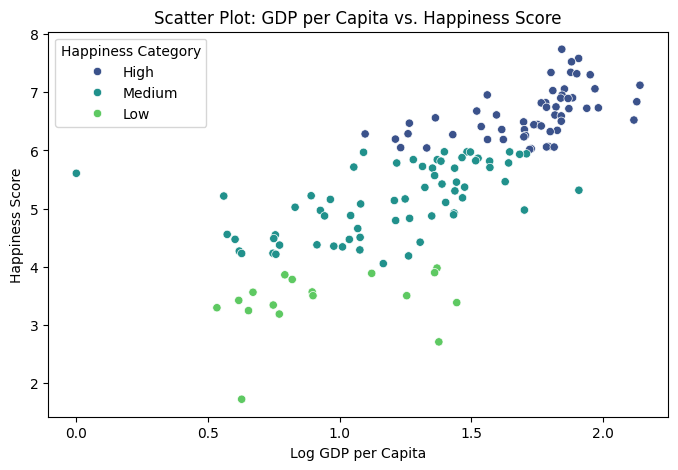

In [160]:
## 2.4 Scatter Plot between GDP per Capita and Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Log GDP per capita', y='score', data=df, hue='Happiness Category', palette='viridis')
plt.title('Scatter Plot: GDP per Capita vs. Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Happiness Category')
plt.show()

# **Problem 2: Some Advance Data Exploration Test**

In [161]:
## Task 1: Preparing the South Asia Dataset
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
south_asia_df = df[df['Country name'].isin(south_asian_countries)]
# Save the South Asia dataset to a CSV file
south_asia_df.to_csv("South_Asia_Happiness.csv", index=False)
print("South Asia dataset saved to 'South_Asia_Happiness.csv'")


South Asia dataset saved to 'South_Asia_Happiness.csv'


In [162]:
## Task 2: Composite Score Ranking
# Calculate Composite Score
south_asia_df['Composite Score'] = (0.40 * south_asia_df['Log GDP per capita'] +
                                    0.30 * south_asia_df['Social support'] +
                                    0.30* south_asia_df['Healthy life expectancy'])
south_asia_df.head()

# Rank countries based on Composite Score
south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False)
print("South Asian countries ranked by Composite Score:")
print(south_asia_df[['Country name', 'Composite Score']])

South Asian countries ranked by Composite Score:
    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


<ipython-input-162-ff86320328ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Composite Score'] = (0.40 * south_asia_df['Log GDP per capita'] +


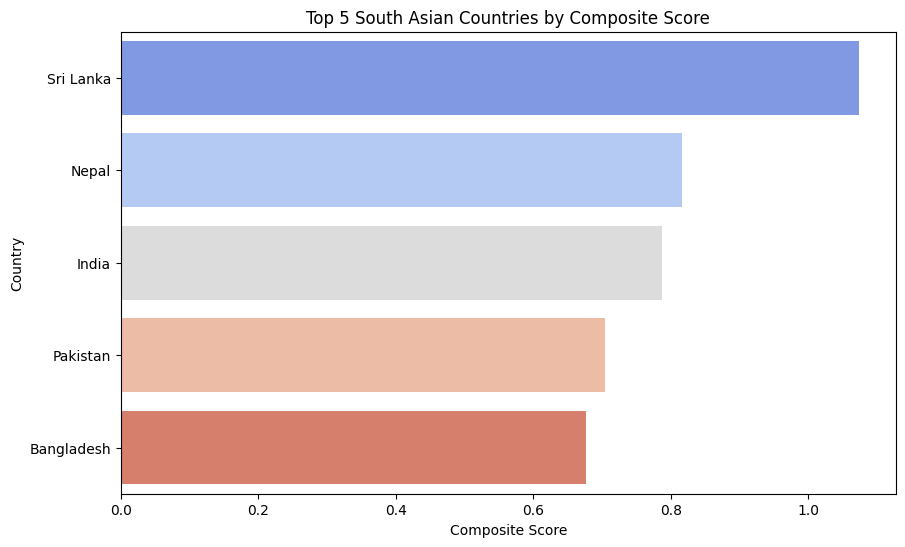

In [163]:
# Visualize the top 5 countries by Composite Score
top_5_composite = south_asia_df.head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_composite, hue='Country name', dodge=False, palette='coolwarm', legend=False)
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()


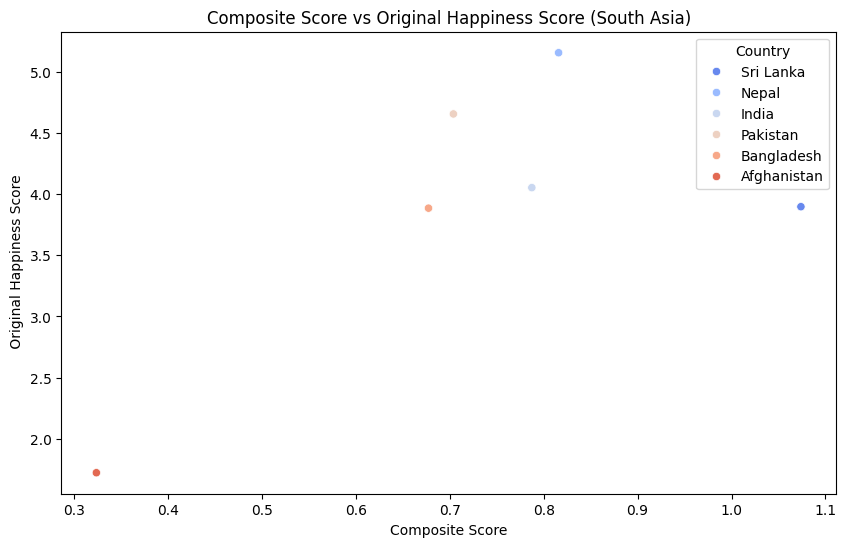

In [164]:
# Discuss alignment with original Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Composite Score', y='score', data=south_asia_df, hue='Country name', palette='coolwarm')
plt.title('Composite Score vs Original Happiness Score (South Asia)')
plt.xlabel('Composite Score')
plt.ylabel(' Original Happiness Score')
plt.legend(title='Country')
plt.show()

**Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.**

-The graph above is a scatter plot that was created to compare the Original Happiness Score with the Composite Score. Its scatter plot tells us that while the two scores may be related, the relationship is only moderate, or more accurately, imperfect. Some waypoints are deviated a lot from the diagonal line which means there are differences between two ranking systems – Composite Score and Original Score.

Observations

* Aligned Rankings: Countries with equally high or low rankings in both scores lie on the diagonal line of the graph.
* The distances away from the diagonal indicate countries with a Composite Score significantly different from the Original Score. For example:

**
Higher values of the Composite Score in contrast to the Original Score} indicates that performance on the weighted indices (GDP per Capita, Social Support, Healthy Life Expectancy) is determined by the results of the said countries.

**
On the other hand, a low score values means poor performance in these indicators as captured by the Standard and Poor’s index’s Composite Score.



In [165]:
## Task 3: Outlier Detection
# Define outliers using 1.5 * IQR rule
def find_outliers(column):
    Q1 = south_asia_df[column].quantile(0.25)
    Q3 = south_asia_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return south_asia_df[(south_asia_df[column] < lower_bound) | (south_asia_df[column] > upper_bound)]

outliers_score = find_outliers('score')
print("Outliers based on Happiness Score:")
outliers_score


Outliers based on Happiness Score:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
142,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low,0.3238


In [166]:
outliers_gdp = find_outliers('Log GDP per capita')
print("Outliers based on GDP per Capita:")
outliers_gdp

Outliers based on GDP per Capita:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
142,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low,0.3238


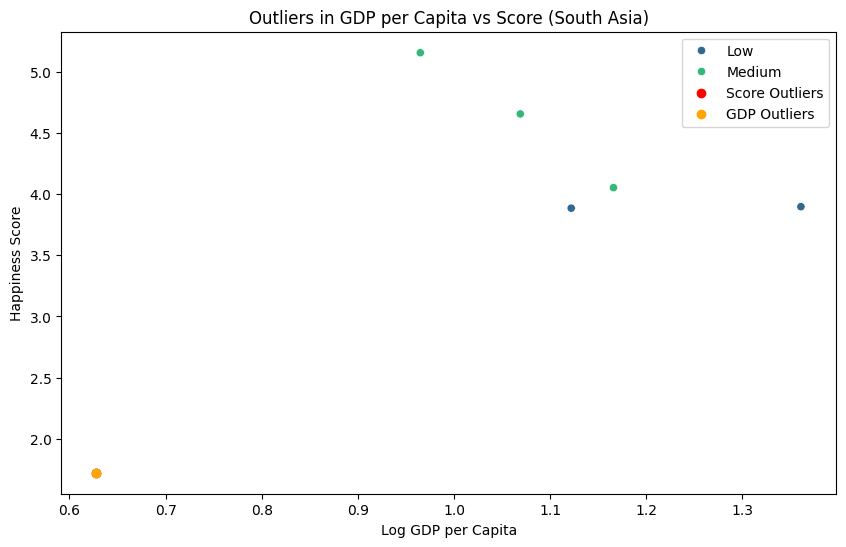

In [167]:
# Scatter plot highlighting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_df, hue='Happiness Category', palette='viridis', legend='full')
plt.scatter(outliers_score['Log GDP per capita'], outliers_score['score'], color='red', label='Score Outliers')
plt.scatter(outliers_gdp['Log GDP per capita'], outliers_gdp['score'], color='orange', label='GDP Outliers')
plt.title('Outliers in GDP per Capita vs Score (South Asia)')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

**Discuss the characteristics of these outliers and their potential impact on regional averages.**

-**Observations:**

- **Outlier Detection:** In the code, we used the Interquartile Range (IQR) method to identify outliers for both the Happiness Score and GDP per Capita. Afghanistan emerged as a clear outlier in both cases. The scatter plot visually highlights how far it deviates from the rest of the data points.

- **Unique Outliers:** Afghanistan shows significantly low values across critical indicators such as GDP per Capita, Social Support, and Healthy Life Expectancy. These poor scores strongly impact both its Happiness Score and Composite Score.

- **Characteristics of Outliers:**  
   - Afghanistan’s low scores in indicators like Freedom to Make Life Choices and Perceptions of Corruption further highlight its struggles.  
   - The scatter plot shows this deviation clearly, with Afghanistan being far from the main cluster of countries in South Asia.

- **Regional Impact:**  
   - Outliers like Afghanistan pull down the regional averages, making the overall performance of South Asia appear worse than it might actually be.  
   - Addressing these disparities could lead to a more balanced view of the region’s progress and highlight areas for targeted improvement.

This analysis helps us better understand the impact of outliers on regional trends and provides insights into where improvement efforts should be focused.






In [168]:
## Task 4: Exploring Trends Across Metrics
# Calculate correlations
freedom_corr = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'])
generosity_corr = south_asia_df['Generosity'].corr(south_asia_df['score'])
print(f"Correlation of Freedom with Score: {freedom_corr}")
print(f"Correlation of Generosity with Score: {generosity_corr}")

Correlation of Freedom with Score: 0.8005185224163315
Correlation of Generosity with Score: 0.874512371253192


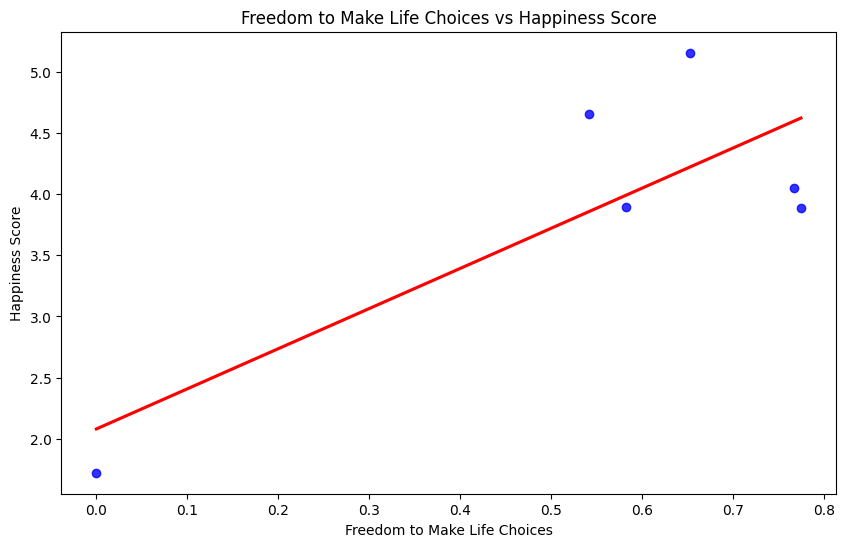

In [169]:
# Scatter plots with trendlines
plt.figure(figsize=(10, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df,ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Freedom to Make Life Choices vs Happiness Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.show()

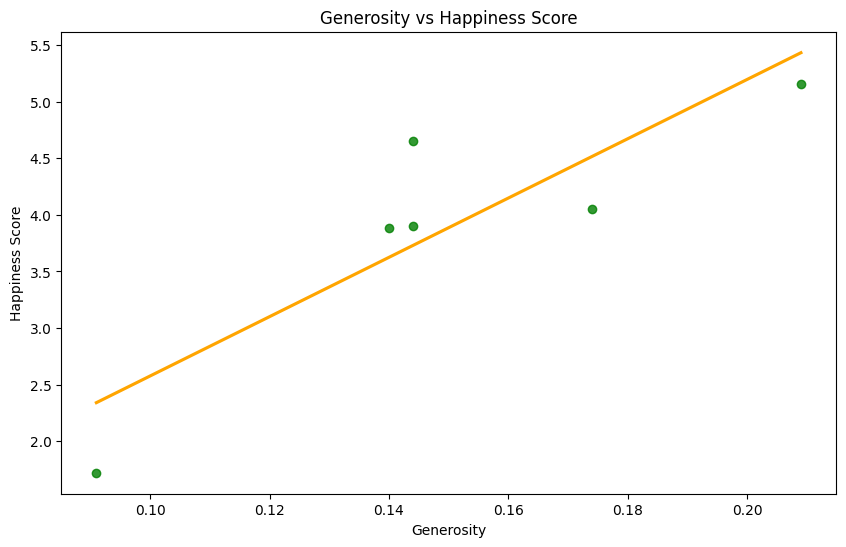

In [170]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity', y='score', data=south_asia_df, ci= None, scatter_kws={'color': 'green'}, line_kws={'color': 'orange'})
plt.title('Generosity vs Happiness Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.show()

**Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.**

-The strongest relationship is between Freedom to make life choices and the Happiness Score. In the scatter plot, there’s a clear upward trend, with the red trendline showing a strong positive connection. The code used `sns.regplot` to create this visualization, making it clear that countries with higher freedom tend to have higher happiness scores.

On the other hand, the weakest relationship is between Generosity

---

and the Happiness Score. The scatter plot is more dispersed, with the points not aligning as closely with the orange trendline. The code used the same approach to plot this, but it shows that generosity has a much smaller impact on happiness in South Asia.

In [171]:
## Task 5: Gap Analysis
# Add GDP-Score Gap column
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']
display(south_asia_df)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093


In [172]:
# Rank by GDP-Score Gap
ascending_gap = south_asia_df.sort_values('GDP-Score Gap', ascending = True)
print("Ascending order of GDP-Score Gap: ")
display(ascending_gap)

Ascending order of GDP-Score Gap: 


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093


In [173]:
descending_gap = south_asia_df.sort_values('GDP-Score Gap', ascending = False)
print("Descending order of GDP-Score Gap: ")
display(descending_gap)

Descending order of GDP-Score Gap: 


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193


In [174]:
print("Top 3 countries with largest negative GDP-Score Gaps:")
ascending_gap.head(3)

Top 3 countries with largest negative GDP-Score Gaps:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888


In [175]:
print("Top 3 countries with largest positive GDP-Score Gaps:")
descending_gap.head(3)

Top 3 countries with largest positive GDP-Score Gaps:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764


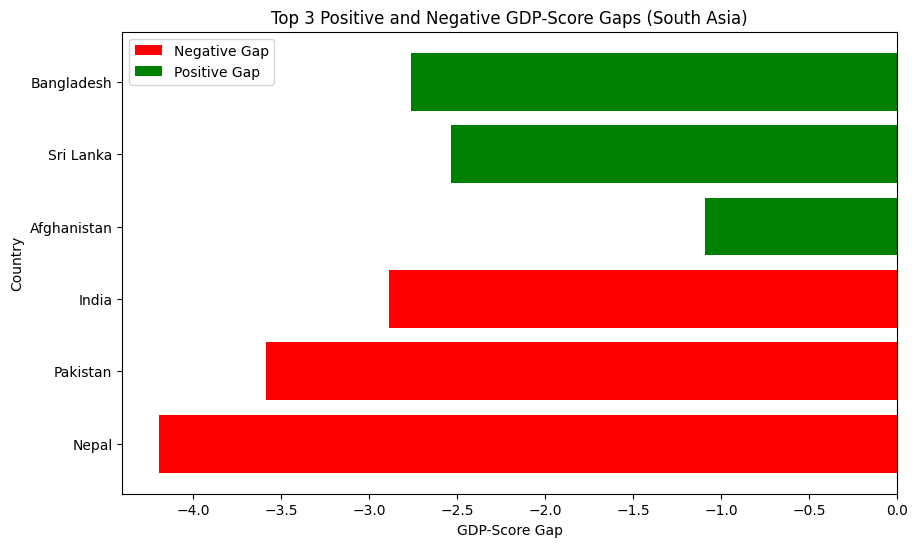

In [176]:
# Visualize top 3 positive and negative gaps
plt.figure(figsize=(10, 6))
plt.barh(ascending_gap['Country name'].head(3), ascending_gap['GDP-Score Gap'].head(3), color='red', label='Negative Gap')
plt.barh(descending_gap['Country name'].head(3), descending_gap['GDP-Score Gap'].head(3), color='green', label='Positive Gap')
plt.title('Top 3 Positive and Negative GDP-Score Gaps (South Asia)')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.legend()
plt.show()

**Analyze the reasons behind these gaps and their implications for South Asian countries.**
  

- Analysis of the Score Gaps to GDP and Their Determinants  

The code computes the “GDP-Score Gap” by logarithm per capita GDP for each South Asian country and deducts the happiness score. The gap is represented in the bar chart by three most positive and three most negative gaps. Bars which are green showing positive gaps include countries like Bangladesh and Sri Lanka where the level of happiness is comparatively greater than the GDP. Countries like Nepal and Pakistan with negative red bars cover major gaps are also countries with lower GDP relative to the levels of happiness experienced.  

The graph shows sharp contrast:  

- Positive Gaps (e.g.Bangladesh and Sri Lanka): These countries have relatively low GDP but seem to do well in happiness index which mean be as a result of social support or culture.  

- Negative Gaps (e.g. Nepal and Pakistan): Happiness is not one of the underlying reasons for their economic growth which may be a cause of such factors as inequality, governance or welfare among others.  

Implications  

The graph and code show further that GDP is not enough for happiness. Positive Gaps point out the relevance of culture whereas Negative Gaps indicate economic or sociocultural situations which might help to reach higher GDP values as well as overall happiness.




# **Problem 3 - Comparative Analysis**

In [177]:
# Preparing the Middle Eastern Dataset
middle_eastern_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
middle_east_df = df[df['Country name'].isin(middle_eastern_countries)]
# Save the Middle East dataset to a CSV file
middle_east_df.to_csv("Middle_East_Happiness.csv", index=False)
print("Middle East dataset saved to 'Middle_East_Happiness.csv'")

Middle East dataset saved to 'Middle_East_Happiness.csv'


In [178]:
## Task 1: Descriptive Statistics
# Calculate mean and standard deviation for Score
south_asia_mean = south_asia_df['score'].mean()
south_asia_std = south_asia_df['score'].std()
middle_east_mean = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()
print(f"South Asia - Mean: {south_asia_mean}, Standard Deviation: {south_asia_std}")
print(f"Middle East - Mean: {middle_east_mean}, Standard: {middle_east_std}")

if south_asia_mean > middle_east_mean:
    print("South Asia has higher average happiness scores.")
else:
    print("Middle East has higher average happiness scores.")


South Asia - Mean: 3.895666666666667, Standard Deviation: 1.1770690152521501
Middle East - Mean: 5.412100000000001, Standard: 1.5662011684327144
Middle East has higher average happiness scores.


In [179]:
## Task 2: Top and Bottom Performers
# Identify top 3 and bottom 3 countries for each region
top_3_south_asia = south_asia_df.nlargest(3, 'score')
top_3_south_asia

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888


In [180]:
bottom_3_south_asia = south_asia_df.nsmallest(3, 'score')
bottom_3_south_asia

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537


In [181]:
top_3_middle_east = middle_east_df.nlargest(3, 'score')
top_3_middle_east

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High


In [182]:
bottom_3_middle_east = middle_east_df.nsmallest(3, 'score')
bottom_3_middle_east

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium


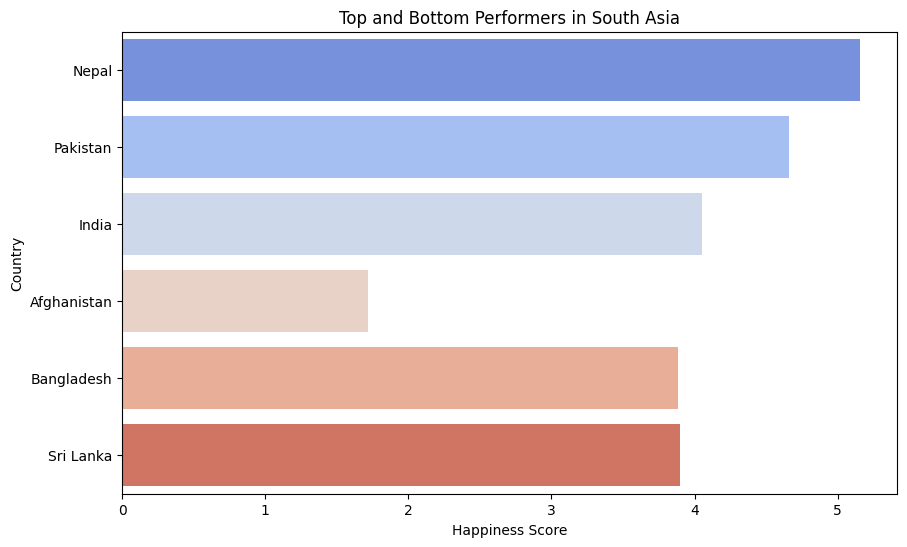

In [183]:
# Plot bar charts
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', hue='Country name', data=pd.concat([top_3_south_asia, bottom_3_south_asia]), dodge=False, palette='coolwarm', legend=False)
plt.title('Top and Bottom Performers in South Asia')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

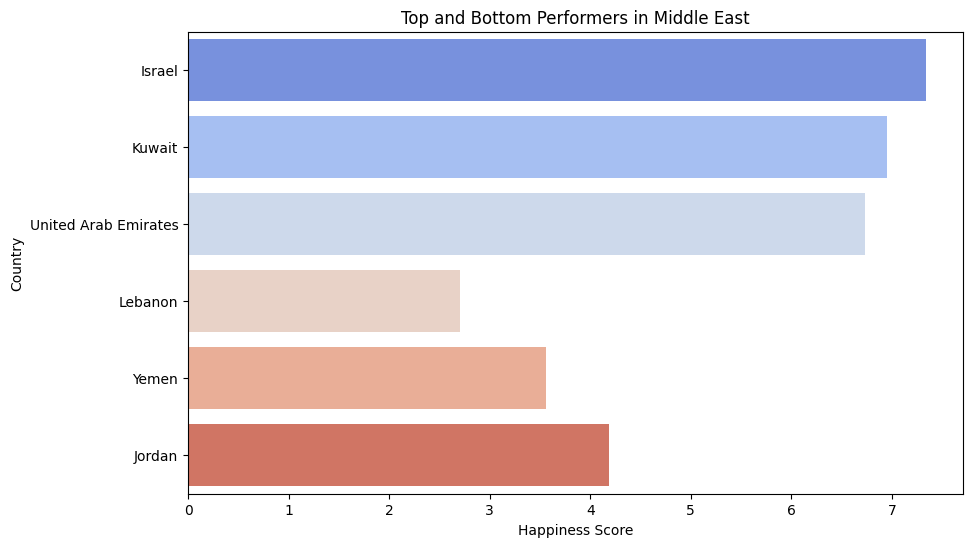

In [184]:
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', hue='Country name', data=pd.concat([top_3_middle_east, bottom_3_middle_east]), dodge=False, palette='coolwarm', legend=False)
plt.title('Top and Bottom Performers in Middle East')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

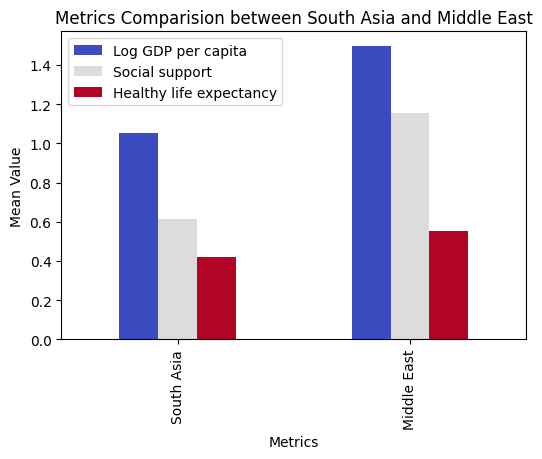

Metrics with largest disparity: Social support


In [185]:
Metrics =['Log GDP per capita', 'Social support', 'Healthy life expectancy']
means = {'South Asia': south_asia_df[Metrics].mean(), 'Middle East': middle_east_df[Metrics].mean()}

comparision_df = pd.DataFrame(means).T
comparision_df.plot(kind ='bar',figsize =(6,4), colormap='coolwarm')
plt.title('Metrics Comparision between South Asia and Middle East')
plt.xlabel('Metrics')
plt.ylabel('Mean Value')
plt.show()

largest_dispairty = (comparision_df.loc['South Asia'] - comparision_df.loc['Middle East']).abs().idxmax()
print(f"Metrics with largest disparity: {largest_dispairty}")

In [186]:
## Task 5: Happiness Disparity
# Calculate range and coefficient of variation
south_asia_range = south_asia_df['score'].max() - south_asia_df['score'].min()
south_asia_cv = south_asia_df['score'].std() / south_asia_df['score'].mean()
middle_east_range = middle_east_df['score'].max() - middle_east_df['score'].min()
middle_east_cv = middle_east_df['score'].std() / middle_east_df['score'].mean()

In [187]:
print(f"South Asia - Range: {south_asia_range}, Coefficient of Variation: {south_asia_cv}")

South Asia - Range: 3.4370000000000003, Coefficient of Variation: 0.30214828833374263


In [188]:
print(f"Middle East - Range: {middle_east_range}, Coefficient of Variation: {middle_east_cv}")

Middle East - Range: 4.634, Coefficient of Variation: 0.28938880812119405


In [189]:
if south_asia_cv > middle_east_cv:
    print("South Asia has greater variability in happiness scores.")
else:
    print("Middle East has greater variability in happiness scores.")


South Asia has greater variability in happiness scores.


South Asia - Correlation of Freedom: 0.8005185224163315, Generosity: 0.874512371253192


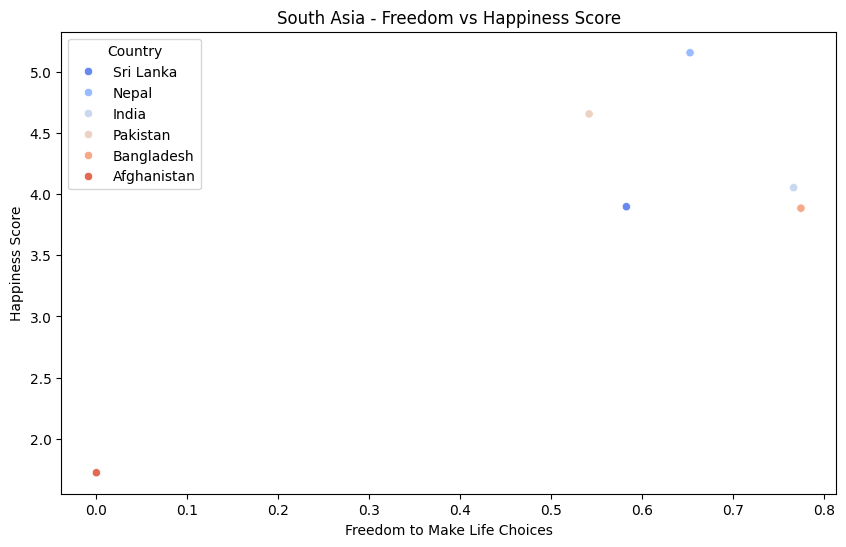

Middle East - Correlation of Freedom: 0.8632202433827543, Generosity: 0.6275236536964182


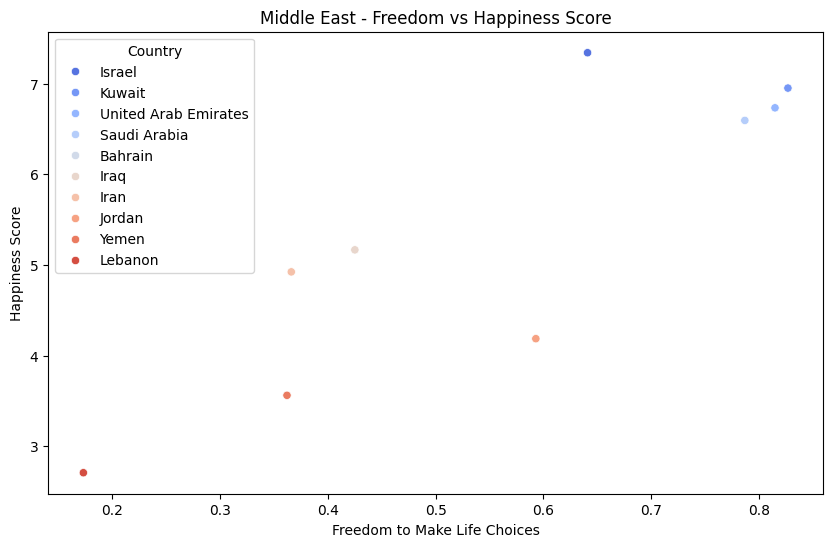

In [190]:
## Task 6: Correlation Analysis
# Correlation of Score with Freedom and Generosity
for region, region_df in zip(['South Asia', 'Middle East'], [south_asia_df, middle_east_df]):
    freedom_corr = region_df['Freedom to make life choices'].corr(region_df['score'])
    generosity_corr = region_df['Generosity'].corr(region_df['score'])
    print(f"{region} - Correlation of Freedom: {freedom_corr}, Generosity: {generosity_corr}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Freedom to make life choices', y='score', data=region_df, hue='Country name', palette='coolwarm')
    plt.title(f'{region} - Freedom vs Happiness Score')
    plt.xlabel('Freedom to Make Life Choices')
    plt.ylabel('Happiness Score')
    plt.legend(title='Country')
    plt.show()

    plt.figure


**Interpret the relationships:**

-The code computes correlations to quantify the relationships between "Freedom to Make Life Choices," "Generosity," and "Happiness Score" for South Asia and the Middle East. Scatterplots highlight these patterns, with freedom plotted against happiness for each region.

### Relationships and Correlation:  
- **South Asia**: A weak positive correlation suggests that increased freedom has limited influence on happiness. Generosity shows an even smaller effect, implying other factors might dominate happiness outcomes.  
- **Middle East**: A strong positive correlation indicates that freedom significantly boosts happiness. Generosity also shows a moderate correlation, reflecting its more notable role in this region.

These results underline how cultural and socio-political contexts shape the strength of correlations, with freedom playing a more critical role in the Middle East than in South Asia.

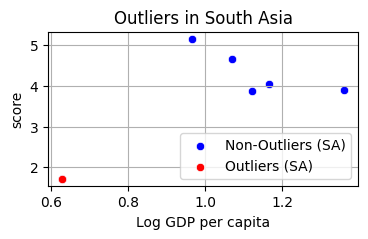

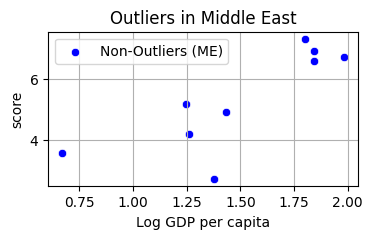

In [191]:
#Outlier Detection:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < Q1 - 1.5 * IQR) | (data[column] > Q3 + 1.5 * IQR)]
    return outliers

outliers_sa = detect_outliers(south_asia_df, 'score')
outliers_me = detect_outliers(middle_east_df, 'score')

plt.figure(figsize=(4, 2))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_df, label='Non-Outliers (SA)', color='blue')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_sa, label='Outliers (SA)', color='red')
plt.title('Outliers in South Asia')
plt.grid()
plt.show()

plt.figure(figsize=(4, 2))
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_df, label='Non-Outliers (ME)', color='blue')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_me, label='Outliers (ME)', color='red')
plt.title('Outliers in Middle East')
plt.grid()
plt.show()

**Discuss their implications:**

-The code uses the IQR method to identify outliers in the "score" metric for South Asia and the Middle East. The scatter plots make it easy to see these outliers—blue dots represent countries with typical relationships between GDP and score, while red dots highlight outliers.

### Implications:
1. **South Asia**:  
   - The red dots (outliers) show countries where scores are much lower than expected based on their GDP. This suggests issues like inequality, poor governance, or inefficiencies in using economic resources.  
   - The code makes it easier to identify these problem areas and focus on them for improvement.

2. **Middle East**:  
   - There are fewer red outliers here, meaning the relationship between GDP and score is generally more consistent. However, the outliers still point to specific challenges, such as conflict or uneven wealth distribution.

By combining the code and the plots, it’s clear which countries need more attention and where resources should be directed to improve well-being.






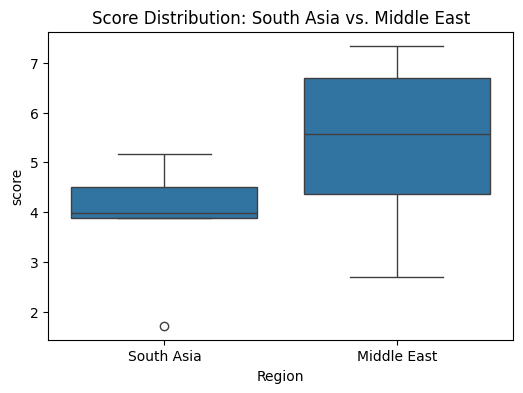

In [192]:
#Visualization
plt.figure(figsize=(6, 4))
sns.boxplot(x='Region', y='score', data=pd.concat([south_asia_df.assign(Region='South Asia'),middle_east_df.assign(Region='Middle East')]))
plt.title('Score Distribution: South Asia vs. Middle East')
plt.show()

**Interpret the key differences in distribution shapes, medians, and outliers.**

-We used the boxplot to compare the score distributions for South Asia and the Middle East, highlighting key differences in shape, median, and outliers.

### Key Observations:
1. **Medians**:  
   - South Asia's median score is much lower than the Middle East's. This indicates that overall well-being or happiness scores in South Asia lag behind the Middle East.

2. **Distribution Shapes**:  
   - South Asia has a compact distribution with a smaller interquartile range (IQR), showing less variability in scores across countries.  
   - The Middle East exhibits a wider IQR, meaning there is more variation in scores among its countries.

3. **Outliers**:  
   - South Asia has a clear outlier below the box (low score), indicating a country significantly underperforming compared to the rest of the region.  
   - The Middle East shows no visible outliers, suggesting a more consistent performance among countries.